# Aula Pratica 1_amostragem

## Imports Necessários

In [1]:
import pandas as pd
import seaborn as sns

## Abrindo arquivo xlsx

In [5]:
lista_alunos = pd.read_excel('lista_alunos.xlsx')

## Analise inicial do arqusivo

In [6]:
lista_alunos.head()

,Nome,Turma,Genero,Idade,Maior dificuldade
0,Abgail,6 ano,Feminino,11,matematica
1,Cauê,6 ano,Masculino,11,matematica
2,Fernando,6 ano,Masculino,11,geografia
3,Lucas Daniel,6 ano,Masculino,11,historia
4,André,6 ano,Masculino,11,portugues


In [7]:
lista_alunos.describe()

,Idade
count,85.000000
mean,13.058824
std,1.506754
min,10.000000
25%,12.000000
50%,13.000000
75%,14.000000
max,16.000000


In [8]:
lista_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Nome               85 non-null     object
 1   Turma              85 non-null     object
 2   Genero             85 non-null     object
 3   Idade              85 non-null     int64 
 4   Maior dificuldade  85 non-null     object
dtypes: int64(1), object(4)
memory usage: 3.4+ KB


In [9]:
lista_alunos['Maior dificuldade'].value_counts()

Maior dificuldade
matematica    36
ciencias      17
portugues     13
historia      11
geografia      5
ingles         3
Name: count, dtype: int64

## Amostragem Probabilistica - Amostragem Aleatoria Simples

In [11]:
amostragem_simples = lista_alunos.sample(n=10)
amostragem_simples

,Nome,Turma,Genero,Idade,Maior dificuldade
44,Alexandre,8 ano,Masculino,13,matematica
4,André,6 ano,Masculino,11,portugues
61,Eduardo Luiz,9 ano,Masculino,14,portugues
3,Lucas Daniel,6 ano,Masculino,11,historia
35,Rodrigo,7 ano,Masculino,12,historia
72,Fernanda,9 ano,Feminino,14,matematica
82,Ronaldo,9 ano,Masculino,16,ciencias
81,Regiane,9 ano,Feminino,14,matematica
14,Rebecca,6 ano,Feminino,10,historia
56,Suelen,8 ano,Feminino,14,historia


In [12]:
amostragem_simples['Maior dificuldade'].value_counts()

Maior dificuldade
historia      4
matematica    3
portugues     2
ciencias      1
Name: count, dtype: int64

In [13]:
amostragem_simples2 = lista_alunos.sample(frac=0.2)
amostragem_simples2

,Nome,Turma,Genero,Idade,Maior dificuldade
67,Camila Christ,9 ano,Feminino,14,matematica
20,Estefany,7 ano,Feminino,12,ciencias
43,Wilian,8 ano,Masculino,13,portugues
8,Gabriely,6 ano,Feminino,12,matematica
68,Debora,9 ano,Feminino,15,portugues
1,Cauê,6 ano,Masculino,11,matematica
11,Marcia,6 ano,Feminino,12,ingles
83,Tulio,9 ano,Masculino,15,matematica
62,Lucas Gabriel,9 ano,Masculino,14,matematica
0,Abgail,6 ano,Feminino,11,matematica


## Amostragem Probabilistica - Amostragem Estradificada

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

In [16]:
lista_alunos['Turma'].value_counts()

Turma
9 ano    25
7 ano    22
8 ano    20
6 ano    18
Name: count, dtype: int64

O código a seguir está utilizando a classe **StratifiedShuffleSplit** para realizar uma divisão estratificada e aleatória dos dados em conjuntos de treinamento e teste.

A função **split** é chamada dentro de um loop for para gerar múltiplas divisões dos dados. A cada iteração do loop, a função split retorna os índices dos elementos que devem ser usados como conjunto de treinamento e teste.

Os parâmetros **X e y** representam os dados de treinamento e seus respectivos rótulos. A função split utiliza esses dados para realizar a divisão estratificada, preservando a proporção de amostras de cada classe nos conjuntos de treinamento e teste.

In [17]:
split = StratifiedShuffleSplit(test_size=0.2)
for x, y in split.split(lista_alunos, lista_alunos['Turma']):
    x = lista_alunos.iloc[x]
    y = lista_alunos.iloc[y]

In [18]:
y

,Nome,Turma,Genero,Idade,Maior dificuldade
29,Felipe Luiz,7 ano,Masculino,12,portugues
24,Daniel,7 ano,Masculino,13,matematica
4,André,6 ano,Masculino,11,portugues
69,Daniela,9 ano,Feminino,13,geografia
39,Wesley,7 ano,Masculino,11,ciencias
37,Vanessa,7 ano,Feminino,12,ciencias
48,Douglas,8 ano,Masculino,16,historia
82,Ronaldo,9 ano,Masculino,16,ciencias
81,Regiane,9 ano,Feminino,14,matematica
12,Mateus,6 ano,Masculino,11,matematica


## Amostragem Probabilistica - Amostragem Sistematica

In [19]:
import numpy as np

In [20]:
semente = np.random.choice(10, 1)
indices = np.arange(0,85,semente)
indices

array([ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78, 84])

In [22]:
amostra = lista_alunos.iloc[indices]
amostra

,Nome,Turma,Genero,Idade,Maior dificuldade
0,Abgail,6 ano,Feminino,11,matematica
6,Eduarda,6 ano,Feminino,13,ciencias
12,Mateus,6 ano,Masculino,11,matematica
18,Allef,7 ano,Masculino,12,portugues
24,Daniel,7 ano,Masculino,13,matematica
30,Julia,7 ano,Feminino,12,geografia
36,Tales,7 ano,Masculino,11,matematica
42,João Victor,8 ano,Masculino,13,ciencias
48,Douglas,8 ano,Masculino,16,historia
54,Ruan,8 ano,Masculino,14,matematica


## Erick Fazendo qualquer merda

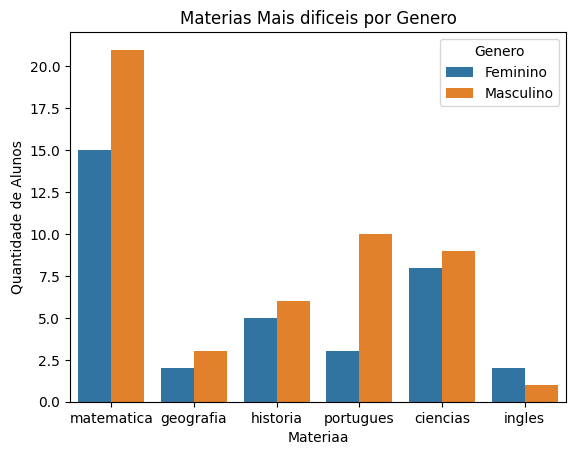

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=lista_alunos, x='Maior dificuldade', hue='Genero')
plt.title('Materias Mais dificeis por Genero')
plt.xlabel('Materiaa')
plt.ylabel('Quantidade de Alunos')
plt.show()

Os mlk são tudo fudido msm

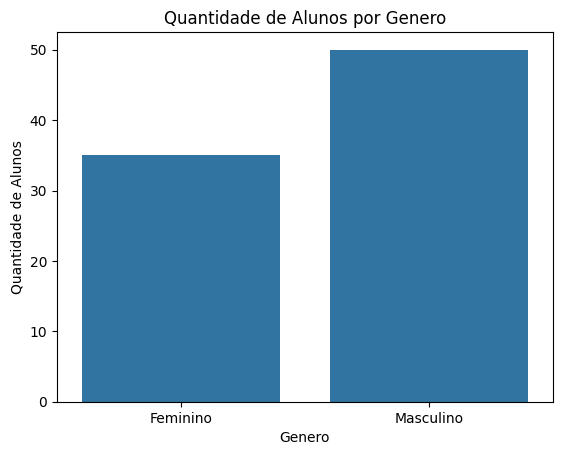

In [26]:
sns.countplot(data=lista_alunos, x='Genero')
plt.title('Quantidade de Alunos por Genero')
plt.xlabel('Genero')
plt.ylabel('Quantidade de Alunos')
plt.show()

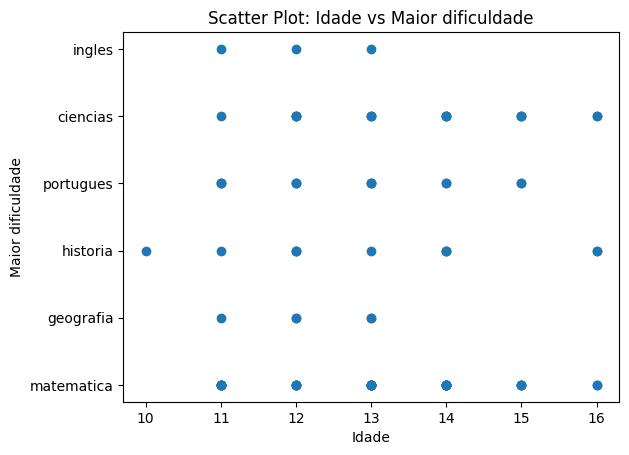

In [27]:
plt.scatter(lista_alunos['Idade'], lista_alunos['Maior dificuldade'])
plt.xlabel('Idade')
plt.ylabel('Maior dificuldade')
plt.title('Scatter Plot: Idade vs Maior dificuldade')
plt.show()